In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_raw = pd.read_csv(r'..\data\IN\diabetes.csv')

In [3]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
cat_cols = ["repeat_retailer", "used_chip", "online_order", "used_pin_number","fraud"]
num_cols = df_raw.select_dtypes(include=[np.number]).columns

In [ ]:
df_raw["Outcome"].value_counts()

fraud
0    912597
1     87403
Name: count, dtype: int64

In [80]:
X = df_raw.drop("fraud", axis=1)
y = df_raw["fraud"]

In [81]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
df_undersampled = pd.concat([X_resampled, pd.Series(y_resampled, name='fraud')], axis=1)


#### Analysis univariante

In [85]:
df_undersampled.describe(percentiles=[.25, .5, .75, .9, .95, .99]).T.sort_values(by='50%', ascending=False).style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
distance_from_home,174806.000000,44.607137,105.106743,0.024602,4.134340,11.745941,37.806171,126.170230,191.254768,429.394951,10632.723672
ratio_to_median_purchase_price,174806.000000,3.720949,4.757109,0.007427,0.691995,2.019423,5.242553,8.411096,11.485600,21.349713,266.689692
distance_from_last_transaction,174806.000000,8.483769,38.338372,0.000407,0.308864,1.060591,3.816536,13.776390,39.644017,130.906817,4968.315477
repeat_retailer,174806.000000,0.880622,0.324234,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
online_order,174806.000000,0.784510,0.411163,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
fraud,174806.000000,0.500000,0.500001,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
used_pin_number,174806.000000,0.057058,0.231953,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
used_chip,174806.000000,0.307392,0.461415,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


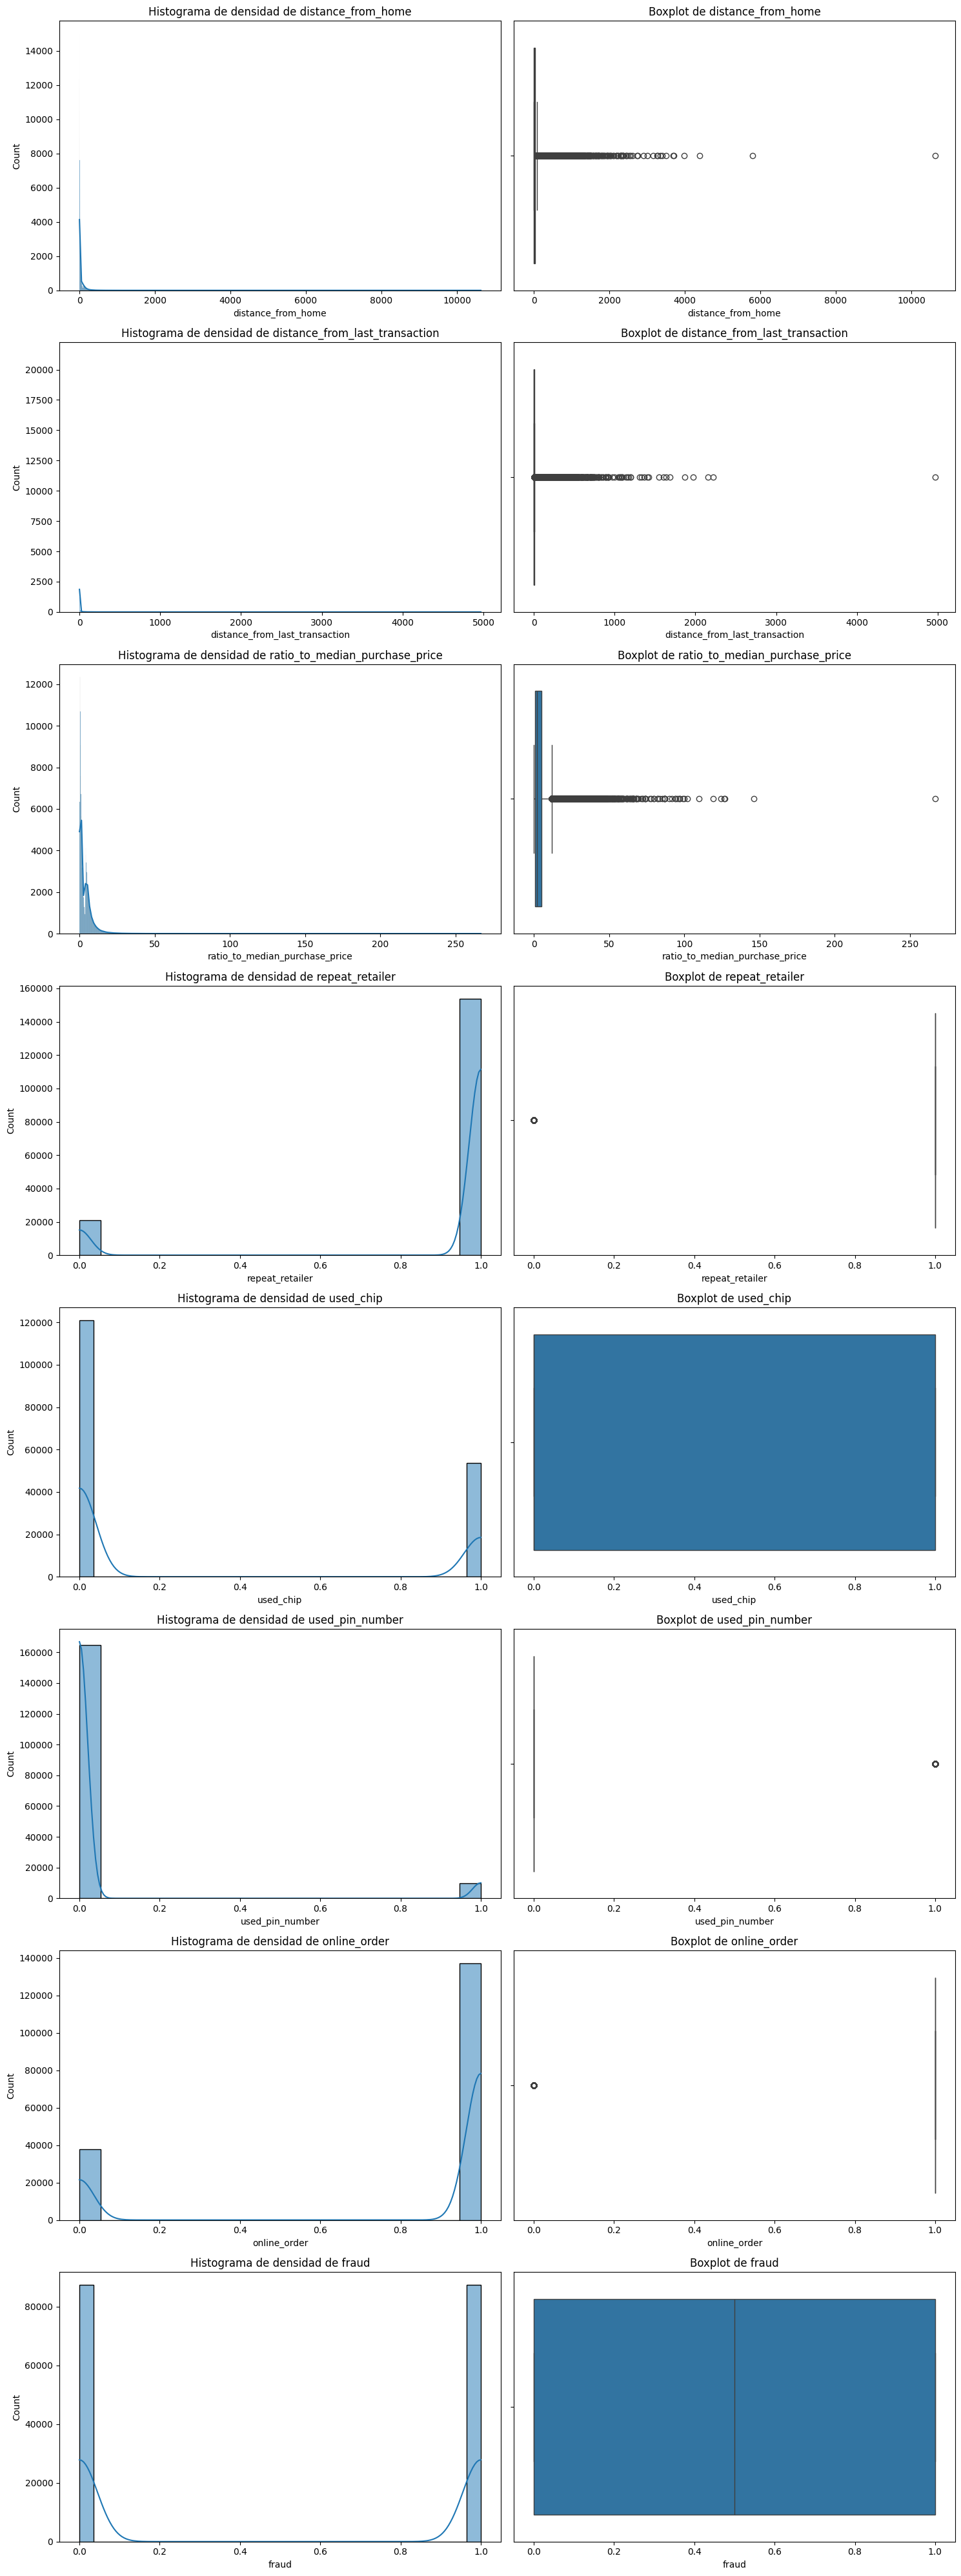

In [82]:
fig, axes = plt.subplots(nrows=len(df_undersampled.select_dtypes(include=[np.number]).columns), ncols=2, figsize=(15, 5 * len(df_undersampled.select_dtypes(include=[np.number]).columns)))

for i, column in enumerate(df_raw[num_cols]):
    # Histograma de densidad
    sns.histplot(df_undersampled[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de densidad de {column}')
    
    # Boxplot
    sns.boxplot(x=df_undersampled[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

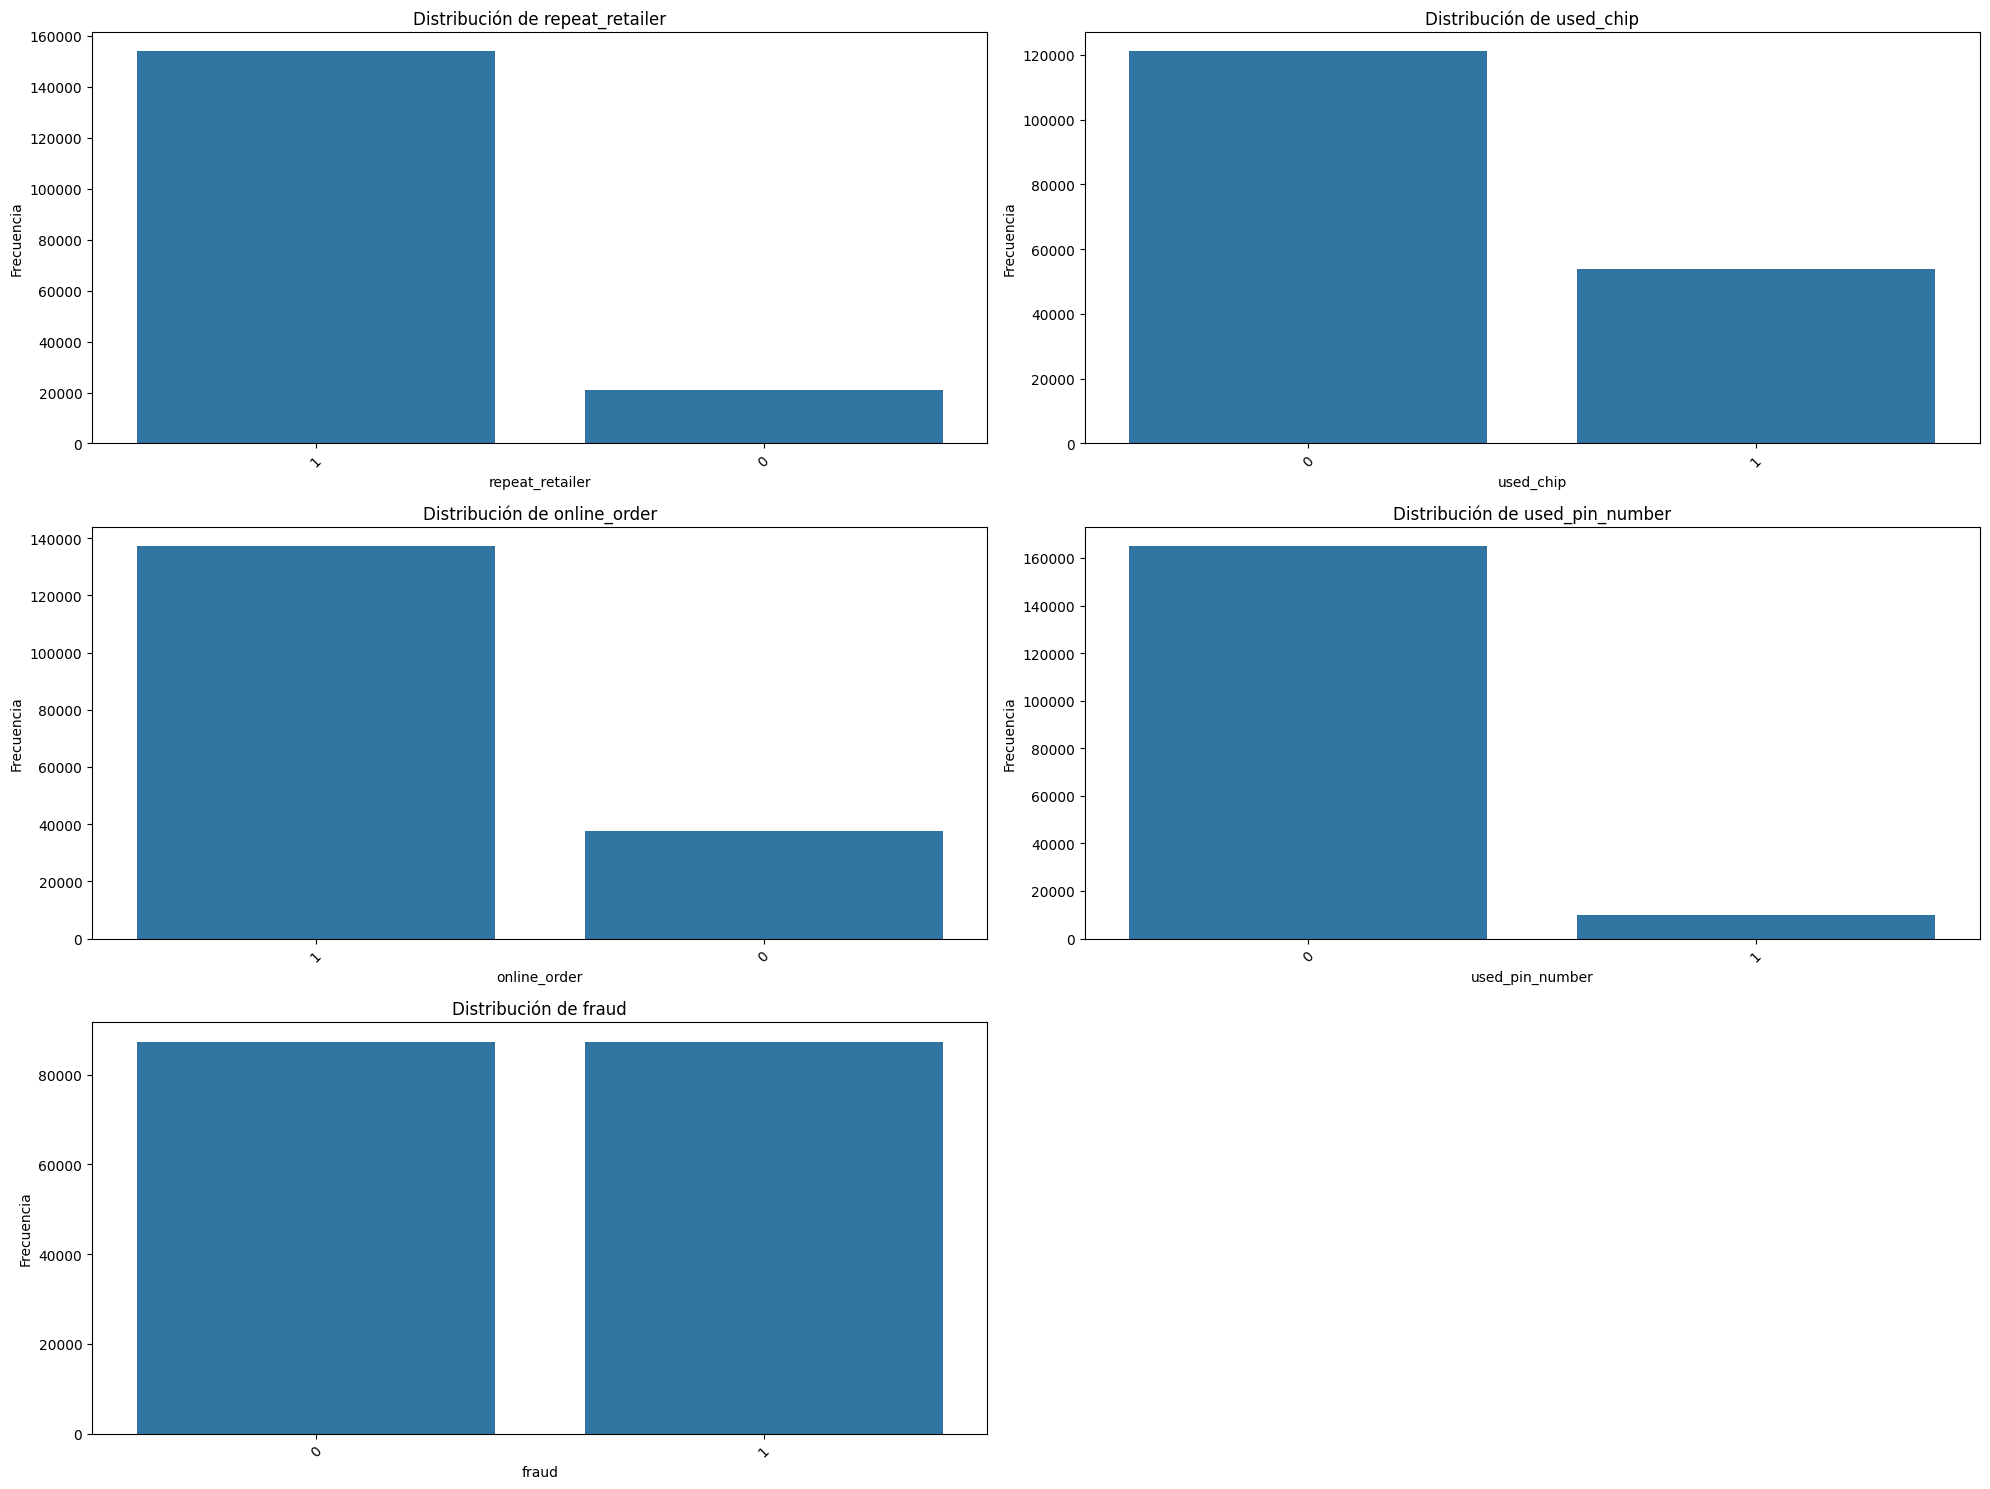

In [83]:
fig, axs = plt.subplots(nrows=len(cat_cols) // 2 + len(cat_cols) % 2, ncols=2, figsize=(20, 5 * (len(cat_cols) // 2 + len(cat_cols) % 2)))

# Aplanar el array de ejes para iterar fácilmente
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df_undersampled, x=col, order=df_undersampled[col].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frecuencia')
    axs[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

# Eliminar subplots vacíos si el número de columnas es impar
if len(cat_cols) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()